In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from littleballoffur import ForestFireSampler
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import torch
import pandas as pd

## Approach I

In [2]:
#Generate graphs of 2-hop neighbourhood
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    plot(graph,'class')
    print('nodeid',nodeid)
    print('node count',len(nodes))
    print('edge count',len(edges))
    return nodes, edges, graph


In [3]:
def plot(G,attribute):
    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}
    nx.draw(G, 
            with_labels=False, 

            node_color=[color_class_map[node[1][attribute]] 
                        for node in G.nodes(data=True)], 
            
           font_color='white',node_size=100)
    print('node count',G.number_of_nodes())
    print('edge count',G.number_of_edges())
    plt.show()

In [4]:
def get_node_degree(G):
    #Adding node degree
    for node in G.nodes():
        d = G.degree(node)
        G.nodes[node]["degree"] = d
    return G

In [5]:
# Compute min, max, mean degree
def statistics_degrees(G):

    degrees = [G.degree(n) for n in G.nodes()]
    return np.max(degrees), np.min(degrees), np.mean(degrees)

In [6]:
def evaluation(real_graph, syn_graph):

    print("Clustering coefficient ratio for real graph: ", nx.average_clustering(real_graph))
    print("Clustering coefficient ratio for generated graph: ", nx.average_clustering(syn_graph))

    
    print("Average path length for real graph: ",nx.average_shortest_path_length(real_graph))
    print("Average path length for synthetic graph: ",nx.average_shortest_path_length(syn_graph))
    
    print("Max, Min,Mean of real graph: ",statistics_degrees(real_graph))
    print("Max, Min,Mean of syn graph: ",statistics_degrees(syn_graph))

In [7]:
import seaborn as sns

def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    print(degrees)
    #plt.hist(degrees)
    sns.histplot(data=degrees)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

### DBLP

In [8]:
G_real_dblp = nx.read_gexf("DBLP_four_area_real.gexf")
G_syn_dblp = nx.read_gexf("DBLP_four_area_hgen.gexf")

In [9]:
node_subset_real = dict((n,d['degree']) for n,d in get_node_degree(G_real_dblp).nodes().items() if d['degree']==2)
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_dblp).nodes().items() if d['degree']==2)

In [10]:
real_first_value = list(node_subset_real.keys())[20]
syn_first_value = list(node_subset_syn.keys())[20]

node count 6
edge count 5


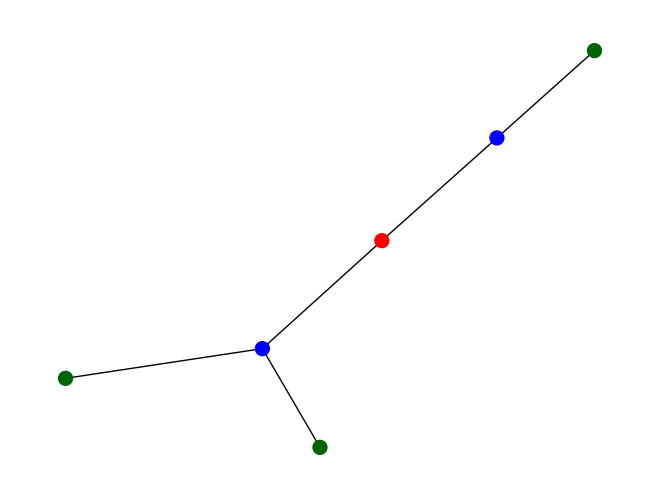

nodeid 331
node count 6
edge count 5


In [11]:
real_nodes, real_nodes, real_small_graph = graph_gen(real_first_value, G_real_dblp)

node count 7
edge count 6


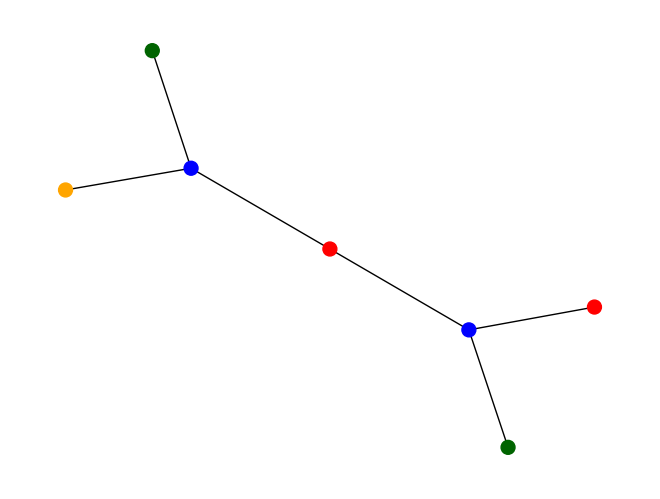

nodeid 545
node count 7
edge count 6


In [12]:
syn_nodes, syn_nodes, syn_small_graph = graph_gen(syn_first_value, G_syn_dblp)

In [13]:
evaluation(real_small_graph, syn_small_graph)

Clustering coefficient ratio for real graph:  0.0
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  2.1333333333333333
Average path length for synthetic graph:  2.2857142857142856
Max, Min,Mean of real graph:  (3, 1, 1.6666666666666667)
Max, Min,Mean of syn graph:  (3, 1, 1.7142857142857142)


### PubMed

In [14]:
G_real_pubmed = nx.read_gexf("PubMed_real.gexf")

In [15]:
G_syn_pubmed = nx.read_gexf("PubMed_hgen.gexf")

In [16]:
node_subset_real = dict((n,d['degree']) for n,d in get_node_degree(G_real_pubmed).nodes().items() if d['degree']==2)
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_pubmed).nodes().items() if d['degree']==2)

In [17]:
real_first_value = list(node_subset_real.keys())[20]
syn_first_value = list(node_subset_syn.keys())[20]

node count 36
edge count 92


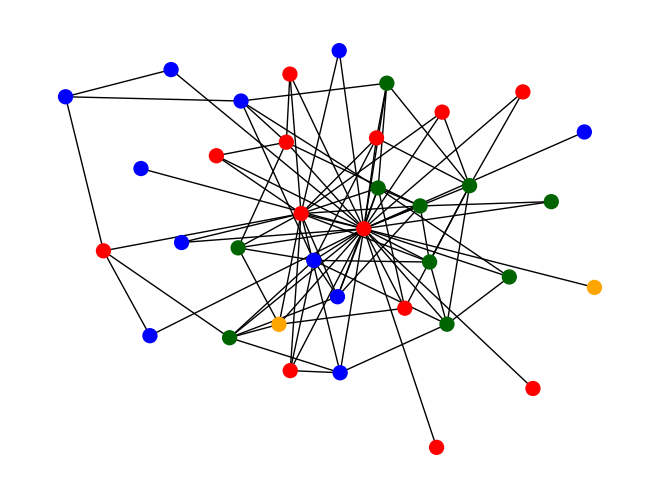

nodeid 233
node count 36
edge count 92


In [18]:
real_nodes, real_nodes, real_small_graph = graph_gen(real_first_value, G_real_pubmed)

node count 34
edge count 39


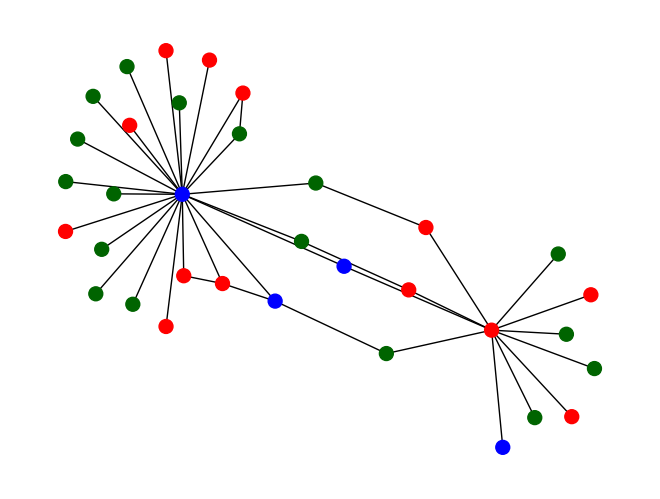

nodeid 223
node count 34
edge count 39


In [19]:
syn_nodes, syn_nodes, syn_small_graph = graph_gen(syn_first_value, G_syn_pubmed)

In [20]:
evaluation(real_small_graph, syn_small_graph)

Clustering coefficient ratio for real graph:  0.397376898788189
Clustering coefficient ratio for generated graph:  0.11802902979373568
Average path length for real graph:  1.9333333333333333
Average path length for synthetic graph:  2.5668449197860963
Max, Min,Mean of real graph:  (32, 1, 5.111111111111111)
Max, Min,Mean of syn graph:  (22, 1, 2.2941176470588234)


### IMDB

In [21]:
G_real_imdb = nx.read_gexf("IMDB_movie_real.gexf")

In [22]:
G_syn_imdb = nx.read_gexf("IMDB_movie_hgen.gexf")

In [23]:
#For IMDB, remove the Genre node type
def remove_genre_nodes(graph):
    nodeId_list = []
    node_type_list = []
    for key, value in graph.nodes(data=True):
        nodeId_list.append(key)
        node_type_list.append(value['class'])


    df_graph = pd.DataFrame()
    df_graph["nodeId"] = nodeId_list
    df_graph["class"] = node_type_list 
    node3_list = list(df_graph[df_graph['class'] == 3]['nodeId'])

    df_edges = nx.to_pandas_edgelist(graph)
    df_edges = df_edges[['source','target']]
    df_edges = df_edges[~df_edges['source'].isin(node3_list)]
    df_edges= df_edges[~df_edges['target'].isin(node3_list)]
    
    small_graph = nx.from_pandas_edgelist(
    df_edges,

    create_using=nx.Graph(),
)
    imdb_node_features = df_graph[['nodeId', 'class']]
    nodes_attr = imdb_node_features.set_index('nodeId').to_dict(orient='index')
    nx.set_node_attributes(small_graph, nodes_attr)
    return small_graph

In [24]:
node_subset_real = dict((n,d['degree']) for n,d in get_node_degree(G_real_imdb).nodes().items() if d['degree']==2)
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_imdb).nodes().items() if d['degree']==2)

In [25]:
real_first_value = list(node_subset_real.keys())[15]
syn_first_value = list(node_subset_syn.keys())[15]

node count 8
edge count 8


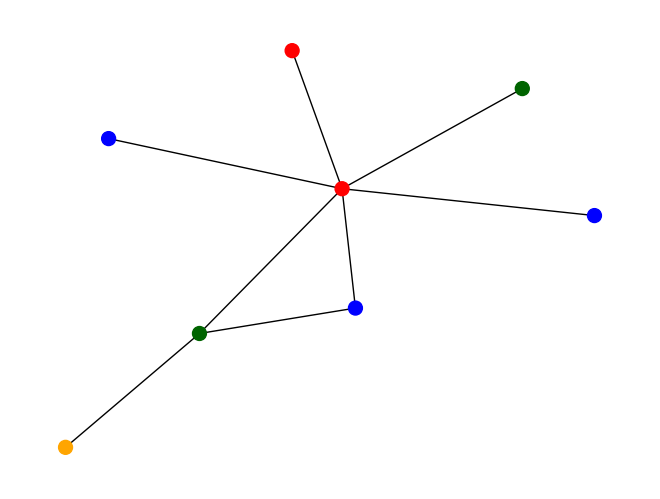

nodeid 187
node count 8
edge count 8


In [26]:
#Original graph
real_nodes, real_nodes, real_small_graph = graph_gen(real_first_value, G_real_imdb)

node count 7
edge count 7


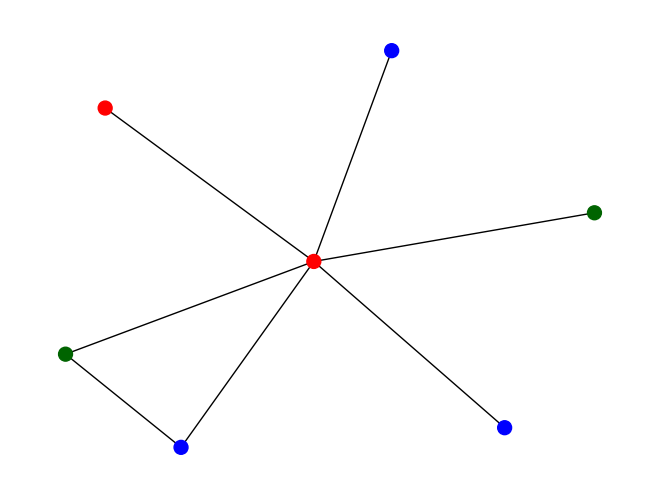

In [27]:
real_small_graph = remove_genre_nodes(real_small_graph)
#After removing Genre node types
plot(real_small_graph,'class')

node count 10
edge count 11


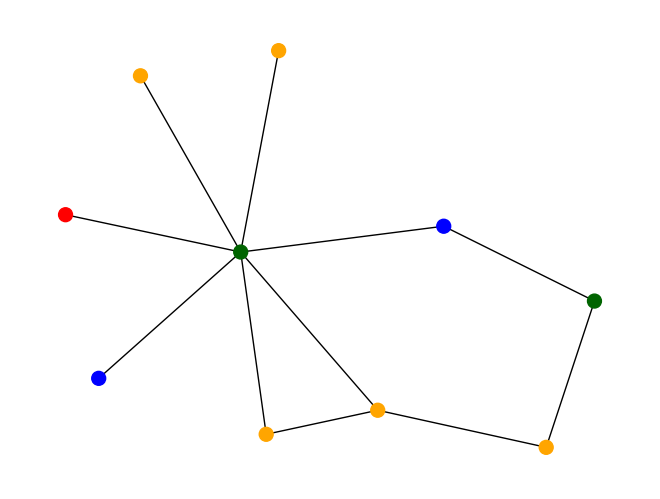

nodeid 388
node count 10
edge count 11


In [28]:
#Original graph
syn_nodes, syn_nodes, syn_small_graph = graph_gen(syn_first_value, G_syn_imdb)

node count 5
edge count 4


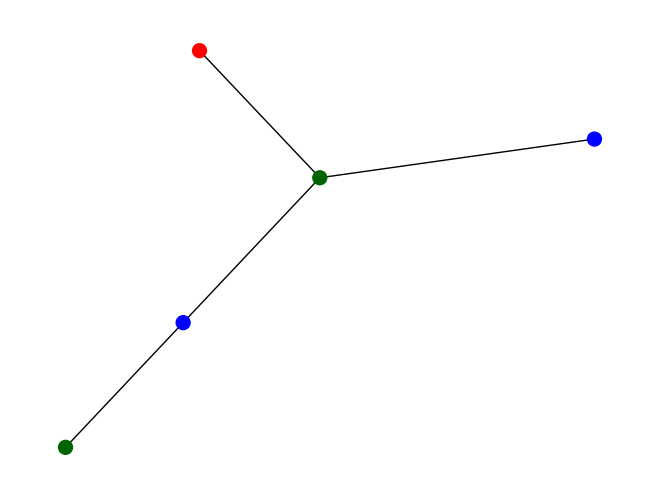

In [29]:
syn_small_graph = remove_genre_nodes(syn_small_graph)
#After removing Genre node types
plot(syn_small_graph,'class')

In [30]:
evaluation(real_small_graph, syn_small_graph)

Clustering coefficient ratio for real graph:  0.2952380952380952
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  1.6666666666666667
Average path length for synthetic graph:  1.8
Max, Min,Mean of real graph:  (6, 1, 2.0)
Max, Min,Mean of syn graph:  (3, 1, 1.6)


## Approach II

### DBLP

In [31]:
G_real_dblp = nx.read_gexf("vae/dblp/real_G20.gexf")

In [32]:
G_syn_dblp = nx.read_gexf("vae/dblp/sync499949232950/sync499949232950_G20.gexf")

In [33]:
dblp_real_classes = torch.load(("vae/dblp/real_node_class20.pt"))
#list(dblp_real_classes.numpy())

In [34]:
dblp_syn_classes = torch.load(("vae/dblp/sync499949232950/sync499949232950_node_class20.pt"))
#list(dblp_syn_classes.detach().numpy())

node count 20
edge count 22


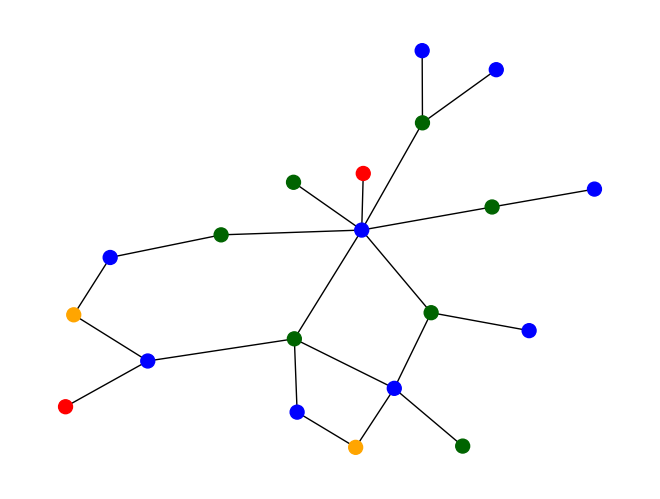

In [35]:
nx.set_node_attributes(G_real_dblp, dict(zip(G_real_dblp.nodes(), list(dblp_real_classes.numpy()))), 'class')
plot(G_real_dblp,'class')

node count 20
edge count 20


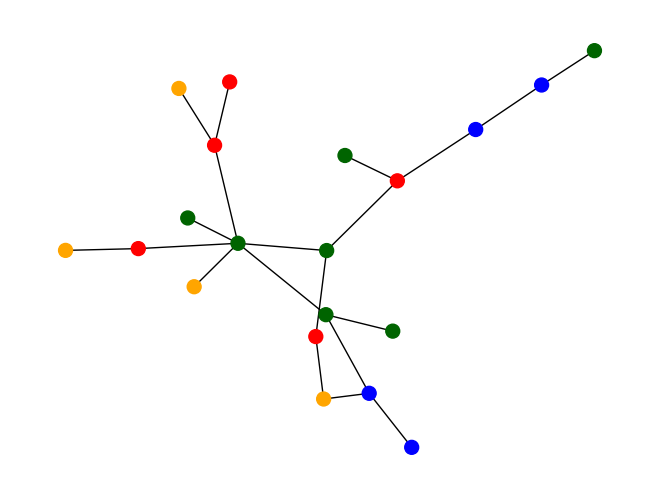

In [36]:
nx.set_node_attributes(G_syn_dblp, dict(zip(G_syn_dblp.nodes(), list(dblp_syn_classes.detach().numpy()))), 'class')
plot(G_syn_dblp,'class')

[1, 2, 1, 4, 1, 3, 2, 1, 1, 4, 1, 1, 2, 3, 2, 2, 2, 1, 7, 3]


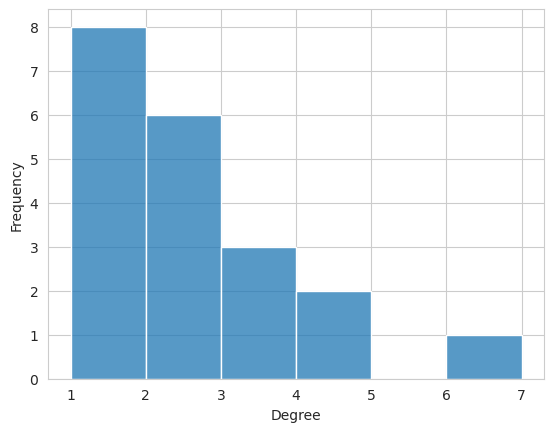

In [37]:
plot_degree_dist(G_real_dblp)

[1, 3, 2, 1, 2, 1, 3, 3, 2, 1, 3, 6, 1, 1, 1, 2, 3, 2, 1, 1]


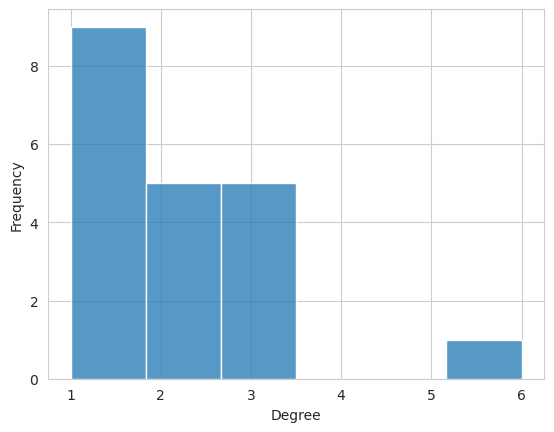

In [38]:
plot_degree_dist(G_syn_dblp)

In [39]:
evaluation(G_real_dblp, G_syn_dblp)

Clustering coefficient ratio for real graph:  0.0
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  2.9526315789473685
Average path length for synthetic graph:  3.4473684210526314
Max, Min,Mean of real graph:  (7, 1, 2.2)
Max, Min,Mean of syn graph:  (6, 1, 2.0)


### PubMed

In [40]:
G_real_pubmed = nx.read_gexf("vae/pubmed/real_G20.gexf")
G_syn_pubmed = nx.read_gexf("vae/pubmed/sync251517203446/sync251517203446_G20.gexf")

In [41]:
pubmed_real_classes = torch.load(("vae/pubmed/real_node_class20.pt"))
#list(pubmed_real_classes.numpy())

In [42]:
pubmed_syn_classes = torch.load(("vae/pubmed/sync251517203446/sync251517203446_node_class20.pt"))
#list(pubmed_syn_classes.detach().numpy())

node count 20
edge count 24


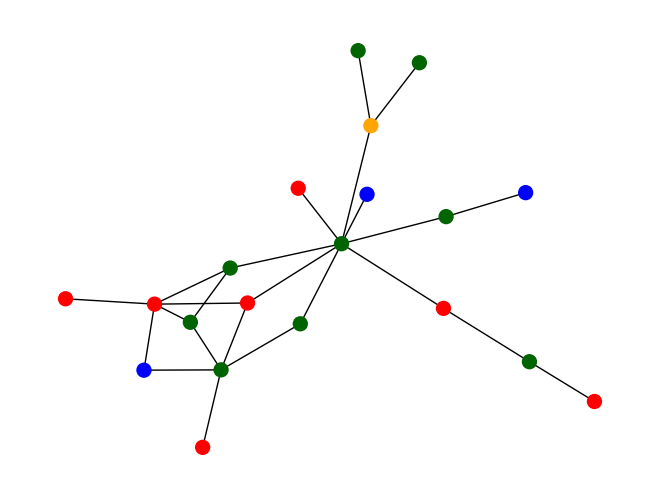

In [43]:
nx.set_node_attributes(G_real_pubmed, dict(zip(G_real_pubmed.nodes(), list(pubmed_real_classes.numpy()))), 'class')
plot(G_real_pubmed,'class')

node count 20
edge count 22


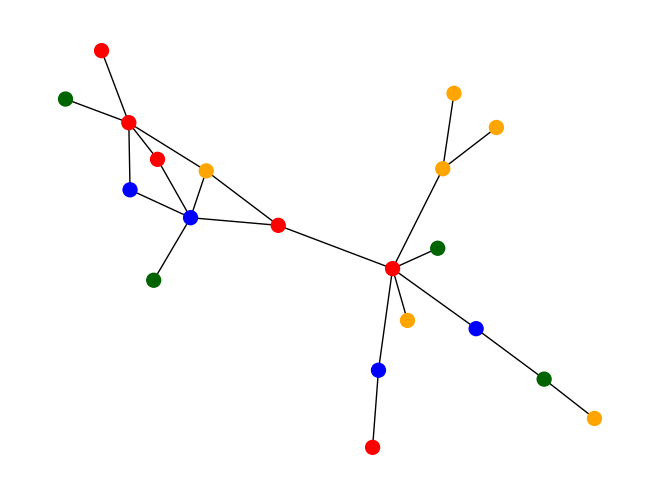

In [44]:
nx.set_node_attributes(G_syn_pubmed, dict(zip(G_syn_pubmed.nodes(), list(pubmed_syn_classes.numpy()))), 'class')
plot(G_syn_pubmed,'class')

[8, 1, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 1, 5, 1, 5, 1]


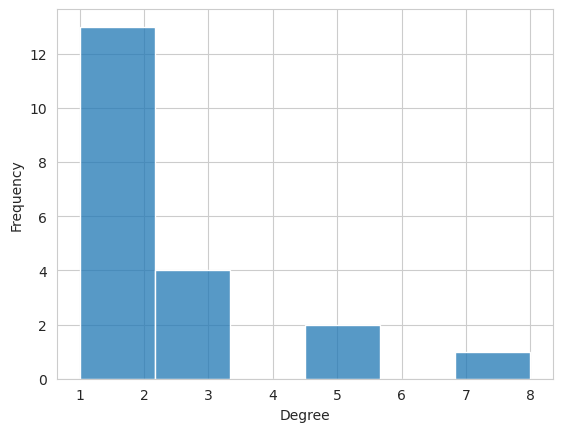

In [45]:
plot_degree_dist(G_real_pubmed)

[6, 3, 2, 3, 2, 1, 1, 1, 5, 1, 1, 2, 5, 3, 1, 1, 1, 2, 2, 1]


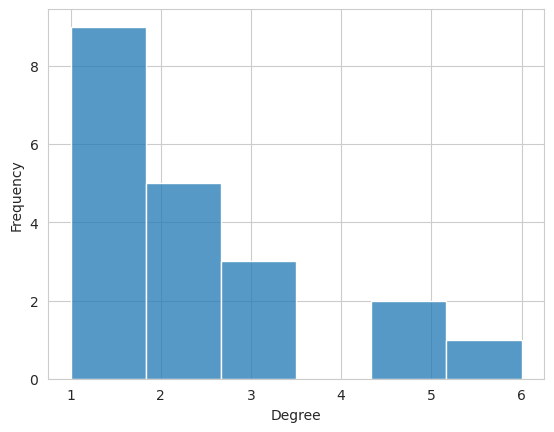

In [46]:
plot_degree_dist(G_syn_pubmed)

In [47]:
evaluation(G_real_pubmed, G_syn_pubmed)

Clustering coefficient ratio for real graph:  0.03833333333333333
Clustering coefficient ratio for generated graph:  0.03833333333333333
Average path length for real graph:  2.9210526315789473
Average path length for synthetic graph:  3.331578947368421
Max, Min,Mean of real graph:  (8, 1, 2.4)
Max, Min,Mean of syn graph:  (6, 1, 2.2)


### IMDB

In [48]:
G_real_imdb = nx.read_gexf("vae/imdb/real_G15.gexf")
G_syn_imdb = nx.read_gexf("vae/imdb/sync131870233442/sync131870233442_G15.gexf")

In [49]:
imdb_real_classes = torch.load(("vae/imdb/real_node_class15.pt"))
#list(imdb_real_classes.numpy())

node count 15
edge count 21


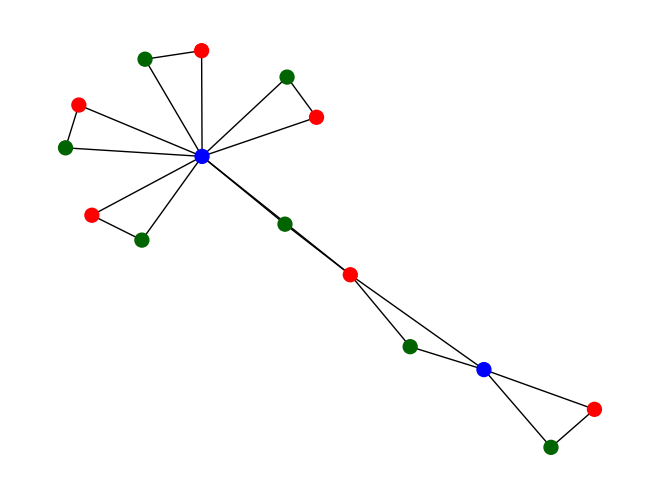

In [50]:
nx.set_node_attributes(G_real_imdb, dict(zip(G_real_imdb.nodes(), list(imdb_real_classes.numpy()))), 'class')
plot(G_real_imdb,'class')

In [51]:
imdb_syn_classes = torch.load(("vae/imdb/sync131870233442/sync131870233442_node_class15.pt"))
#list(imdb_syn_classes.detach().numpy())

node count 15
edge count 19


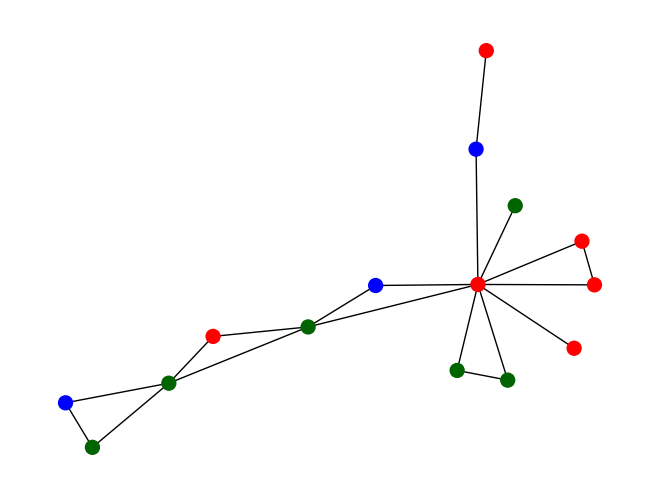

In [52]:
nx.set_node_attributes(G_syn_imdb, dict(zip(G_syn_imdb.nodes(), list(imdb_syn_classes.numpy()))), 'class')
plot(G_syn_imdb,'class')

[1, 2, 1, 4, 1, 3, 2, 1, 1, 4, 1, 1, 2, 3, 2, 2, 2, 1, 7, 3]


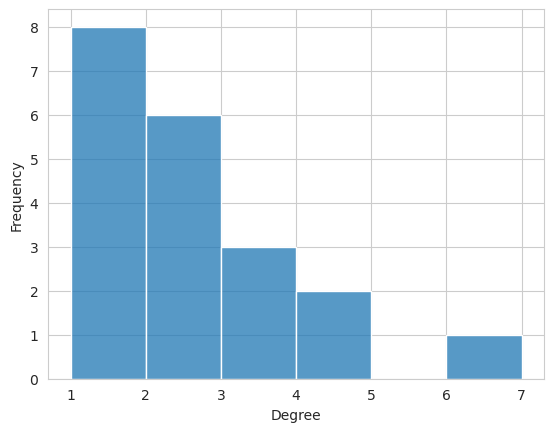

In [53]:
plot_degree_dist(G_real_dblp)

[1, 3, 2, 1, 2, 1, 3, 3, 2, 1, 3, 6, 1, 1, 1, 2, 3, 2, 1, 1]


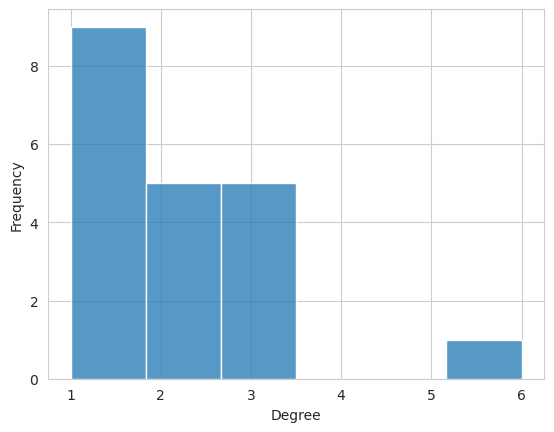

In [54]:
plot_degree_dist(G_syn_dblp)

In [55]:
evaluation(G_real_imdb, G_syn_imdb)

Clustering coefficient ratio for real graph:  0.8518518518518517
Clustering coefficient ratio for generated graph:  0.5833333333333334
Average path length for real graph:  2.295238095238095
Average path length for synthetic graph:  2.4285714285714284
Max, Min,Mean of real graph:  (10, 2, 2.8)
Max, Min,Mean of syn graph:  (9, 1, 2.533333333333333)


## Approach III

### DBLP

In [56]:
G_real_dblp = nx.read_gexf("diffusion/dblp/real_G20.gexf")

In [57]:
G_syn_dblp = nx.read_gexf("diffusion/dblp/graph_1.gexf")

node count 20
edge count 22


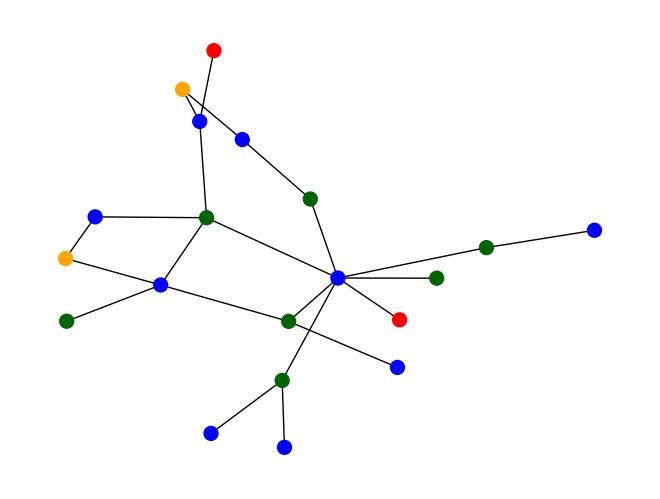

In [58]:
plot(G_real_dblp,'node_type')

node count 20
edge count 28


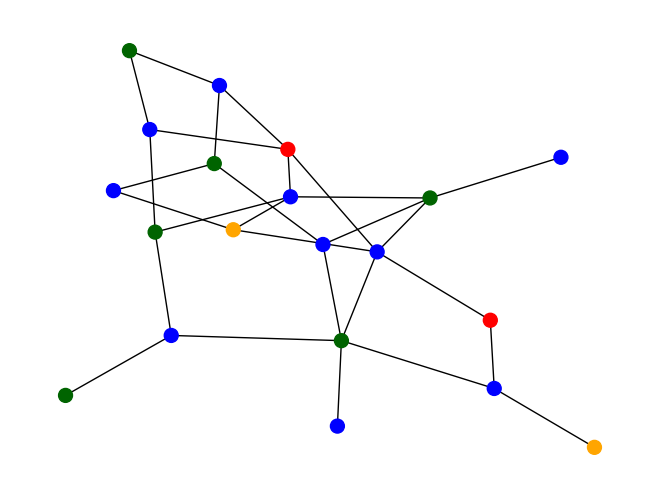

In [59]:
plot(G_syn_dblp,'color_val')

[1, 2, 1, 4, 1, 3, 2, 1, 1, 4, 1, 1, 2, 3, 2, 2, 2, 1, 7, 3]


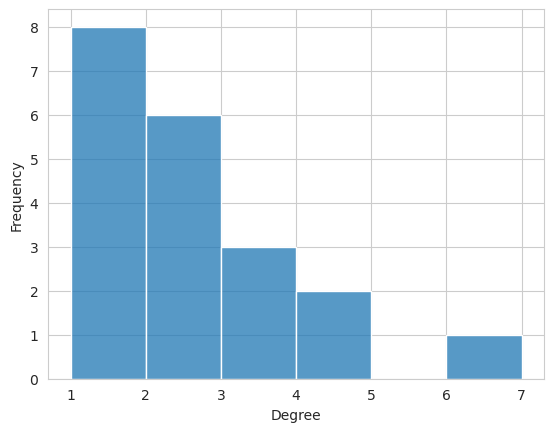

In [60]:
plot_degree_dist(G_real_dblp)

[5, 1, 2, 5, 1, 3, 2, 3, 3, 3, 3, 1, 2, 4, 3, 4, 1, 3, 4, 3]


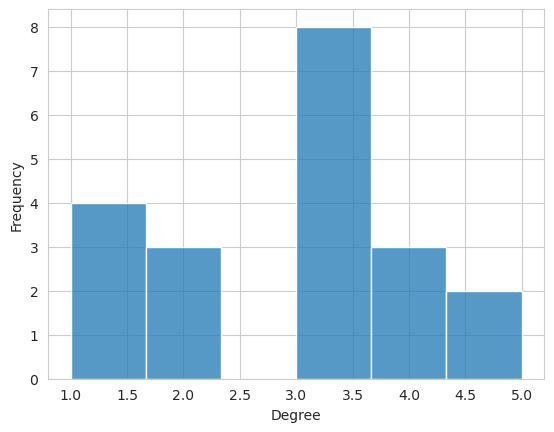

In [61]:
plot_degree_dist(G_syn_dblp)

In [62]:
evaluation(G_real_dblp, G_syn_dblp)

Clustering coefficient ratio for real graph:  0.0
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  2.9526315789473685
Average path length for synthetic graph:  2.7578947368421054
Max, Min,Mean of real graph:  (7, 1, 2.2)
Max, Min,Mean of syn graph:  (5, 1, 2.8)


### PubMed

In [63]:
G_real_pubmed = nx.read_gexf("diffusion/pubmed/real_G20.gexf")

In [64]:
G_syn_pubmed = nx.read_gexf("diffusion/pubmed/graph_3.gexf")

node count 20
edge count 24


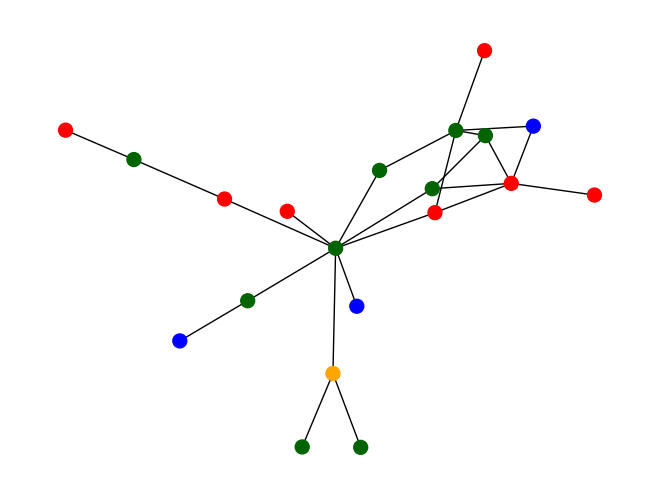

In [65]:
plot(G_real_pubmed,'node_type')

node count 20
edge count 25


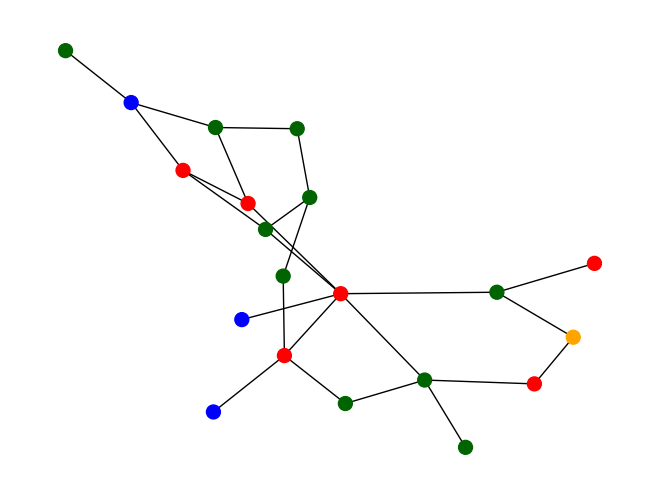

In [66]:
plot(G_syn_pubmed,'color_val')

[8, 1, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 1, 5, 1, 5, 1]


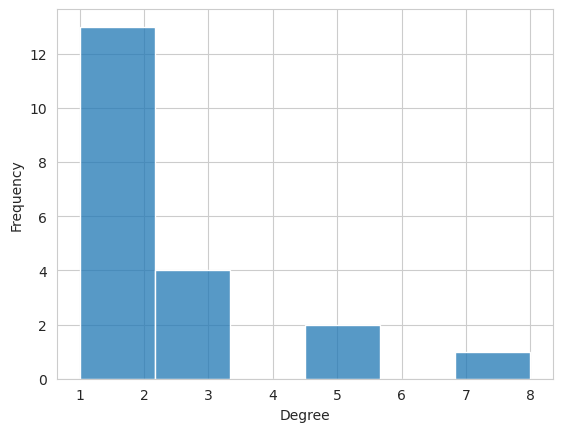

In [67]:
plot_degree_dist(G_real_pubmed)

[4, 2, 3, 1, 2, 3, 2, 1, 3, 1, 3, 1, 4, 3, 1, 2, 3, 6, 3, 2]


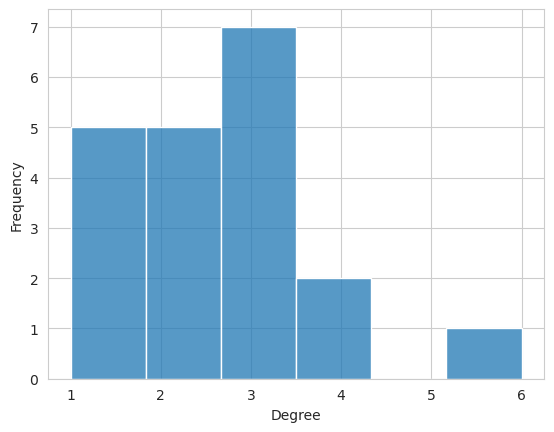

In [68]:
plot_degree_dist(G_syn_pubmed)

In [69]:
evaluation(G_real_pubmed, G_syn_pubmed)

Clustering coefficient ratio for real graph:  0.03833333333333333
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  2.9210526315789473
Average path length for synthetic graph:  2.942105263157895
Max, Min,Mean of real graph:  (8, 1, 2.4)
Max, Min,Mean of syn graph:  (6, 1, 2.5)


### IMDB

In [70]:
G_real_imdb = nx.read_gexf("diffusion/imdb/real_G15.gexf")

In [71]:
G_syn_imdb = nx.read_gexf("diffusion/imdb/graph_14.gexf")

node count 15
edge count 21


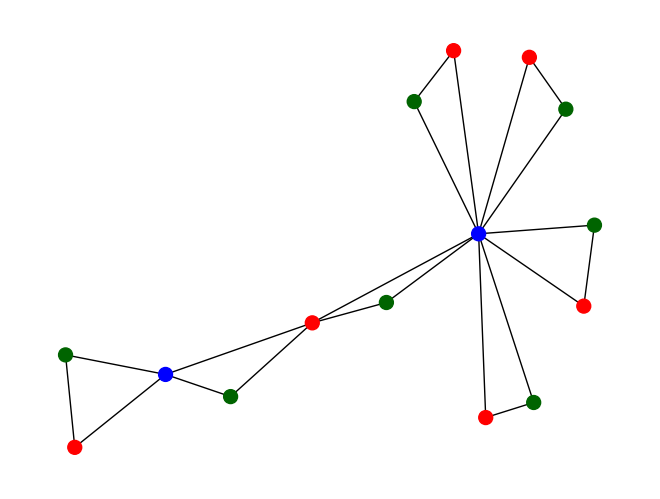

In [72]:
plot(G_real_imdb,'node_type')

node count 15
edge count 20


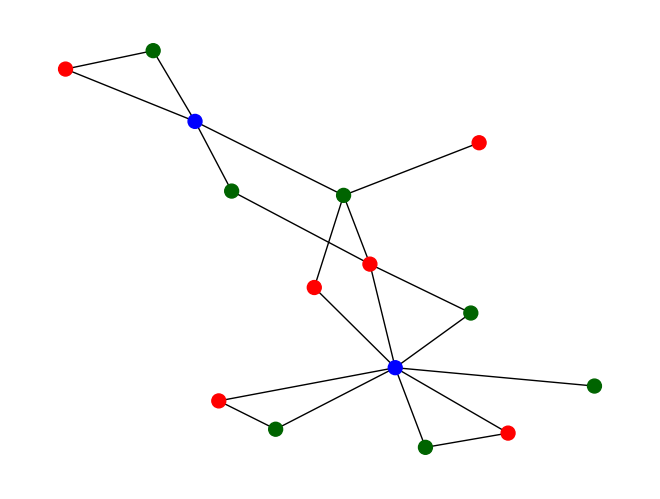

In [73]:
plot(G_syn_imdb,'color_val')

[4, 2, 2, 2, 2, 2, 2, 4, 10, 2, 2, 2, 2, 2, 2]


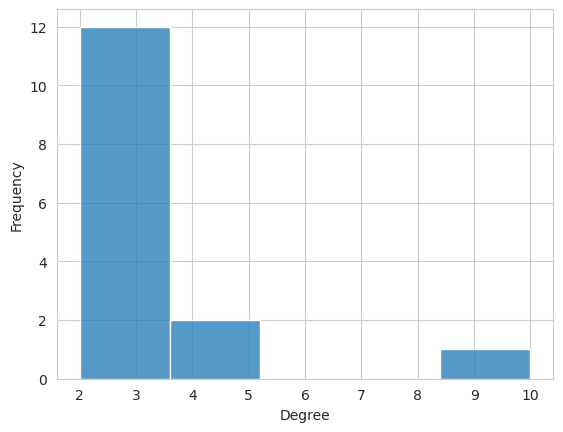

In [74]:
plot_degree_dist(G_real_imdb)

[2, 4, 2, 8, 1, 2, 4, 2, 4, 2, 2, 1, 2, 2, 2]


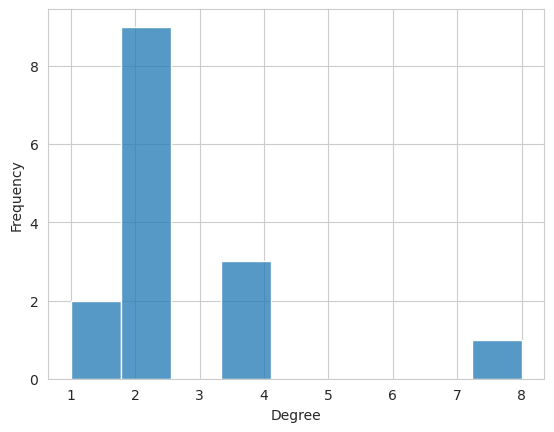

In [75]:
plot_degree_dist(G_syn_imdb)

In [76]:
evaluation(G_real_imdb, G_syn_imdb)

Clustering coefficient ratio for real graph:  0.8518518518518517
Clustering coefficient ratio for generated graph:  0.49603174603174605
Average path length for real graph:  2.295238095238095
Average path length for synthetic graph:  2.5714285714285716
Max, Min,Mean of real graph:  (10, 2, 2.8)
Max, Min,Mean of syn graph:  (8, 1, 2.6666666666666665)
